## **PREPARATIONS**

In [1]:
# Install pykan and shap libraries
!pip install pykan==0.2.7
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 3.1 MB/s eta 0:00:00


In [2]:
# Import the libraries
import torch
from kan import *
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import warnings

# Deactivate the warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the datasets
datasets = joblib.load('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Pickles/datasets.pkl')

# Access individual datasets
X_train = datasets['X_train']
X_test = datasets['X_test']
y_train = datasets['y_train']
y_test = datasets['y_test']

# Standardize the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
#joblib.dump(scaler, '/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Pickles/scaler.pkl')

In [5]:
# Convert to PyTorch tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32, device=device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32, device=device)
# Convert y_train and y_test to NumPy arrays before converting to tensors
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32, device=device).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32, device=device).reshape(-1, 1)

# Prepare the dataset in the required format
dataset = {
    'train_input': X_train_tensor,
    'test_input': X_test_tensor,
    'train_label': y_train_tensor,
    'test_label': y_test_tensor
}

print("Train data shape: {}".format(dataset['train_input'].shape))
print("Train target shape: {}".format(dataset['train_label'].shape))
print("Test data shape: {}".format(dataset['test_input'].shape))
print("Test target shape: {}".format(dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([3072, 5])
Train target shape: torch.Size([3072, 1])
Test data shape: torch.Size([768, 5])
Test target shape: torch.Size([768, 1])


## **TRAINING**

In [72]:
# Define the KANs model
model = KAN(width=[X_train.shape[1], 30, 1],
            grid=15,
            k=3,
            seed=0,
            device=device)

checkpoint directory created: ./model
saving model version 0.0


In [73]:
# List untuk menyimpan loss
train_losses = []
validation_losses = []

# Jumlah langkah yang diinginkan
steps = 16

for step in range(steps):
    # Fit the model for one step
    results = model.fit(dataset,
                        opt="LBFGS",
                        metrics=None,  # Kita akan menghitung metrik secara manual
                        loss_fn=torch.nn.MSELoss(),
                        steps=1,  # Hanya satu langkah per iterasi
                        lamb=0,
                        lamb_entropy=0,
                        save_fig=False)

    # Mendapatkan train_loss dan test_loss dari results
    train_loss = results['train_loss'][-1]  # Ambil nilai terakhir dari train_loss
    test_loss = results['test_loss'][-1]    # Ambil nilai terakhir dari test_loss

    # Simpan loss ke dalam list
    train_losses.append(train_loss)
    validation_losses.append(test_loss)

| train_loss: 7.72e-02 | test_loss: 8.26e-02 | reg: 2.15e+01 | : 100%|█| 1/1 [00:00<00:00,  2.54it/s


saving model version 0.1


| train_loss: 4.61e-02 | test_loss: 5.75e-02 | reg: 2.18e+01 | : 100%|█| 1/1 [00:00<00:00,  2.67it/s


saving model version 0.2


| train_loss: 3.72e-02 | test_loss: 4.72e-02 | reg: 2.19e+01 | : 100%|█| 1/1 [00:00<00:00,  2.68it/s


saving model version 0.3


| train_loss: 3.21e-02 | test_loss: 4.46e-02 | reg: 2.21e+01 | : 100%|█| 1/1 [00:00<00:00,  2.63it/s


saving model version 0.4


| train_loss: 2.94e-02 | test_loss: 4.23e-02 | reg: 2.22e+01 | : 100%|█| 1/1 [00:00<00:00,  2.83it/s


saving model version 0.5


| train_loss: 2.77e-02 | test_loss: 4.16e-02 | reg: 2.23e+01 | : 100%|█| 1/1 [00:00<00:00,  2.85it/s


saving model version 0.6


| train_loss: 2.63e-02 | test_loss: 4.05e-02 | reg: 2.23e+01 | : 100%|█| 1/1 [00:00<00:00,  2.65it/s


saving model version 0.7


| train_loss: 2.54e-02 | test_loss: 4.00e-02 | reg: 2.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.62it/s


saving model version 0.8


| train_loss: 2.47e-02 | test_loss: 3.98e-02 | reg: 2.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.65it/s


saving model version 0.9


| train_loss: 2.40e-02 | test_loss: 3.94e-02 | reg: 2.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.68it/s


saving model version 0.10


| train_loss: 2.36e-02 | test_loss: 3.93e-02 | reg: 2.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.60it/s


saving model version 0.11


| train_loss: 2.33e-02 | test_loss: 3.92e-02 | reg: 2.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.62it/s


saving model version 0.12


| train_loss: 2.30e-02 | test_loss: 3.91e-02 | reg: 2.24e+01 | : 100%|█| 1/1 [00:00<00:00,  2.81it/s


saving model version 0.13


| train_loss: 2.28e-02 | test_loss: 3.91e-02 | reg: 2.25e+01 | : 100%|█| 1/1 [00:00<00:00,  2.74it/s


saving model version 0.14


| train_loss: 2.26e-02 | test_loss: 3.92e-02 | reg: 2.25e+01 | : 100%|█| 1/1 [00:00<00:00,  2.52it/s


saving model version 0.15


| train_loss: 2.24e-02 | test_loss: 3.90e-02 | reg: 2.25e+01 | : 100%|█| 1/1 [00:00<00:00,  2.70it/s

saving model version 0.16


In [74]:
# Konversi ke list biasa
train_losses_list = [float(loss) for loss in train_losses]
validation_losses_list = [float(loss) for loss in validation_losses]

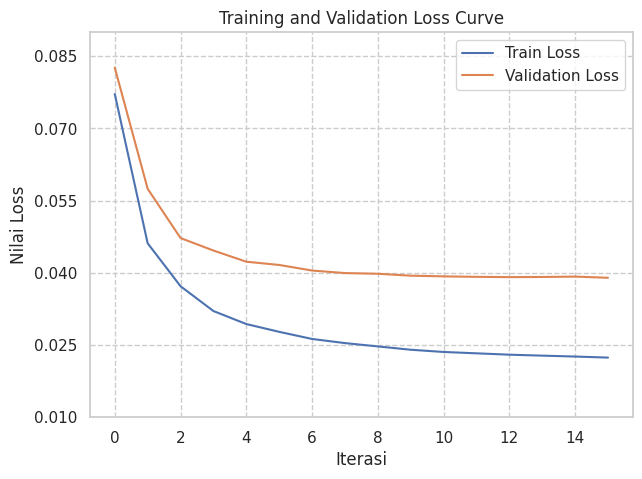

In [75]:
# Plot kurva training dan validation loss
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
plt.ylim(0.01, 0.09)
plt.yticks(np.arange(0.01, 0.09, 0.015))
plt.xticks(np.arange(0, 16, 2))
plt.plot(train_losses, label='Train Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Iterasi')
plt.ylabel('Nilai Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [83]:
# Save the model using torch
torch.save(model.state_dict(), '/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Pickles/kans_model.pth')

In [77]:
# Menghitung RMSE untuk data pengujian
with torch.no_grad():  # Matikan gradien untuk efisiensi
    y_test_pred = model.forward(X_test_tensor)  # Gunakan forward untuk mendapatkan prediksi
    y_test_pred = y_test_pred.detach().cpu().numpy()  # Konversi ke numpy
    y_test_actual = y_test_tensor.detach().cpu().numpy()  # Nilai aktual dari data pengujian

# Menghitung RMSE
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
print(f"RMSE on Test Set: {rmse_test}")

# Menghitung R-squared
r_squared = r2_score(y_test_actual, y_test_pred)
print(f"R-squared on Test Set: {r_squared}")

RMSE on Test Set: 0.03898253750197418
R-squared on Test Set: 0.9977903366088867


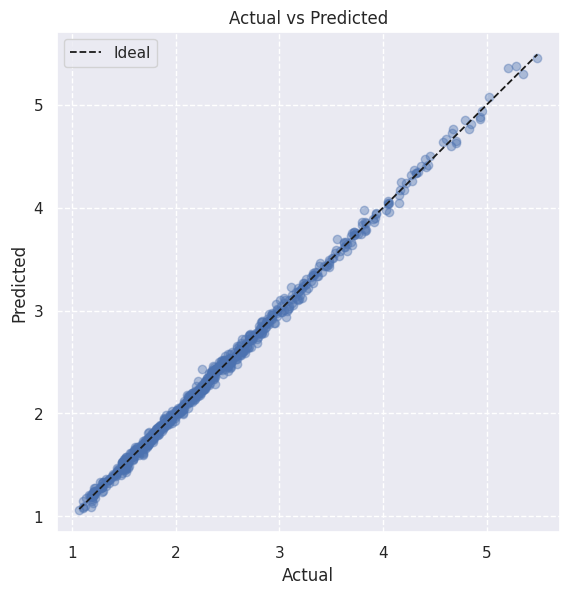

In [78]:
# Scatter plot untuk R-squared
plt.figure(figsize=(6.5, 6.5))
# Set style seaborn
sns.set_theme(style="darkgrid")
plt.scatter(y_test_actual, y_test_pred, alpha=0.4)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'k--', lw=1.3, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [85]:
# Load trained KAN model
model.load_state_dict(torch.load('/content/drive/MyDrive/Research/Regression Analysis - Qult and SF/Modeling - SF/Pickles/kans_model.pth'))
model.eval()  # Set to evaluation mode

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [86]:
# Convert test set tensors back to NumPy for SHAP analysis
X_test_numpy = X_test_tensor.cpu().detach().numpy()
y_test_numpy = y_test_tensor.cpu().detach().numpy()

In [87]:
# Define a prediction function for SHAP
def model_predict(X_numpy):
    X_tensor = torch.tensor(X_numpy, dtype=torch.float32, device=device)
    with torch.no_grad():
        return model(X_tensor).cpu().detach().numpy()

# Use KernelExplainer with the FULL test set
explainer = shap.KernelExplainer(model_predict, X_test_numpy)

# Compute SHAP values for all test samples
shap_values = explainer.shap_values(X_test_numpy)

  0%|          | 0/768 [00:00<?, ?it/s]

In [88]:
import pandas as pd
import numpy as np

# Reshape SHAP values to (num_samples, num_features)
shap_values_reshaped = np.squeeze(shap_values)

# Convert to DataFrame
shap_df = pd.DataFrame(shap_values_reshaped, columns=X_train.columns)

# Display first few rows
print(shap_df.head())


     PGA(g)      B(m)     DF(m)  Y(kN/m3)  Beban(kN)
0  0.338025 -0.489163 -0.035587  0.021675   0.019576
1 -0.446464  0.291550  0.665534  0.118201  -0.549825
2 -0.799761  0.045982 -0.386788  0.048743   0.391591
3 -0.141483  0.214863  0.059826  0.089561  -0.333923
4  0.134766 -0.034204  0.268385  0.126344  -0.673250


In [89]:
import pandas as pd
import numpy as np

# Reshape SHAP values to (num_samples, num_features)
shap_values_reshaped = np.squeeze(shap_values)

# Convert to DataFrame
shap_df = pd.DataFrame(shap_values_reshaped, columns=X_train.columns)

# Compute mean absolute SHAP values
mean_shap_values = shap_df.abs().mean()

# Display mean SHAP values
print(mean_shap_values)


PGA(g)       0.313343
B(m)         0.244712
DF(m)        0.256942
Y(kN/m3)     0.087723
Beban(kN)    0.410948
dtype: float64


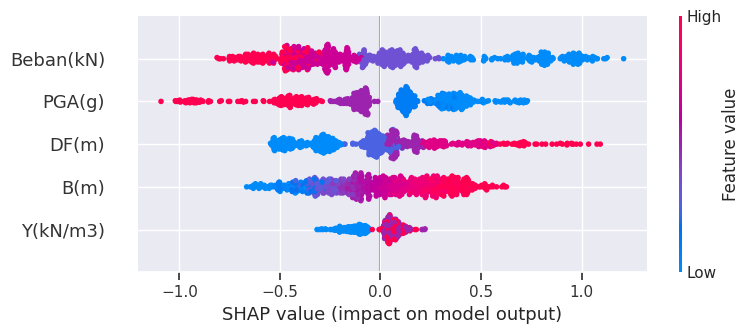

In [90]:
shap.summary_plot(shap_values_reshaped, X_test_numpy, feature_names=X_train.columns)